In [1]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing import subsample_point_cloud, create_digital_elevation_model

In [2]:
path = '../data/reduced_Inspecciones_Aéreas_Cámara_L2_Lidar_1.las'
las = subsample_point_cloud(path, factor=1)

In [3]:
name_file = 'dem3.npz'
x,y,z = las.x, las.y, las.z
dem_info = create_digital_elevation_model(x,y,z) # cambiar ahora es un dict dem_info
np.savez_compressed(name_file, dem=dem_info.get('dem'), mask=dem_info.get('mask'))


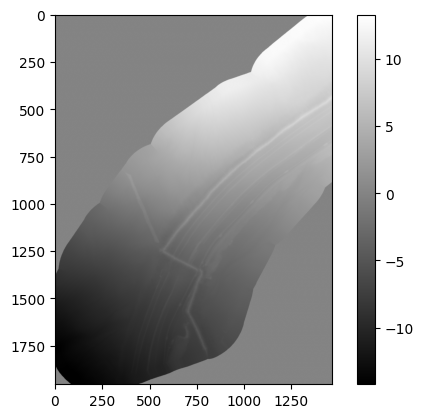

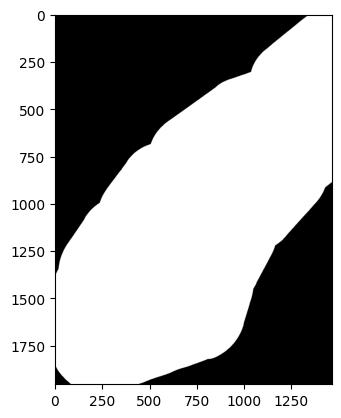

In [4]:
plt.imshow(np.load(name_file)['dem'], cmap='gray') 
plt.colorbar()
plt.show()
plt.imshow(np.load(name_file)['mask'], cmap='gray') 
plt.show()

In [5]:
import cv2
img = np.load(name_file)['dem']
print(img.shape)

img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
img = img.astype(np.uint8)
cv2.imwrite('dem.png', img)



(1954, 1464)


True